In [110]:
import glob

import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.markers import CARETLEFTBASE, CARETRIGHTBASE

all_files = glob.glob("roll_data/*-strikes.csv")

df = pd.concat((pd.read_csv(f) for f in all_files), ignore_index=True)

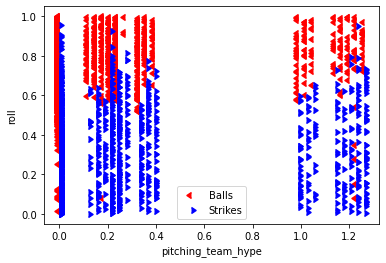

In [115]:
df['astrid_svc'] = 0.375 + 0.25 * df["pitcher_ruthlessness"] + 0.035 * df["pitcher_coldness"] - 0.2 * df["ballpark_forwardness"]
df['batter_strikeattr'] = df['batter_moxie'] * ~df['passed'] + df['batter_patheticism'] * df['passed']
df['ruth_and_fwd'] = df['pitcher_ruthlessness'] - 0.5 * df['ballpark_forwardness']

# df = df[(df["batting_team_hype"] == 0) & (df['pitching_team_hype'] == 0)]

x_val = "pitching_team_hype"
fig, ax = plt.subplots(1)
ax.scatter(df[~df['passed']][x_val], df[~df['passed']]["roll"], color="red", label="Balls", marker=CARETLEFTBASE)
ax.scatter(df[df['passed']][x_val], df[df['passed']]["roll"], color="blue", label="Strikes", marker=CARETRIGHTBASE)
ax.set_xlabel(x_val)
ax.set_ylabel('roll')
ax.legend()

# endpoints = np.array(ax.get_xlim())
# ax.plot(endpoints, 0.35 + 0.35 * endpoints)

In [98]:
df.groupby('pitcher_ruthlessness').head(1)[['pitcher_ruthlessness', 'pitcher_name']].sort_values('pitcher_ruthlessness')

,pitcher_ruthlessness,pitcher_name
1701,0.400135,Axel Cardenas
2583,0.440357,Joshua Watson
2156,0.564919,Patchwork Southwick
1,0.740309,Grollis Zephyr
1807,0.864538,Inky Rutledge
1336,0.917466,Kennedy Rodgers
2611,0.954493,Cudi Di Batterino
2178,0.987573,Cravel Gesundheit
3023,1.115507,Jacoby Podcast
0,1.141035,Cory Twelve


In [118]:
df.groupby(['batter_name', 'pitcher_name']).size()

batter_name         pitcher_name       
--l-xa-dre- Walton  Axel Cardenas          9
                    Betsy Trombone         9
                    Brock Forbes           9
                    Chorby Short           3
                    Cory Twelve            7
                                          ..
Zesty Yaboi         Inky Rutledge          3
                    Jacoby Podcast         8
                    Mags Banananana        5
                    Patchwork Southwick    1
                    Rivers Rosa            5
Length: 541, dtype: int64

In [126]:
highest_strike = df[df['passed']].groupby(['batter_name', 'pitcher_name']).max('roll')
lowest_ball = df[df['passed']].groupby(['batter_name', 'pitcher_name']).min('roll')
merged_df2 = (lowest_ball['roll'] - highest_strike['roll']).unstack('pitcher_name')

TypeError: imsave() missing 1 required positional argument: 'arr'

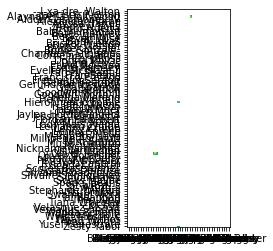

In [128]:
plt.imshow(merged_df2)
plt.xticks(np.arange(merged_df2.shape[1]), merged_df2.columns)
plt.yticks(np.arange(merged_df2.shape[0]), merged_df2.index)